In [2]:
import json
import math
import os
  


path_to_json = './data/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('r_1.819.json')]
print(json_files)  # for me this prints ['foo.json']
data = []
for file in json_files:
    # Opening JSON file
    f = open(path_to_json + file)
    data += json.load(f)

['egg_callibration_9_r_1.819.json']


In [10]:
count

15

In [25]:
data

[{'name': 0, 'before': [[79, 99]], 'after': [[841, 595]]},
 {'name': 1, 'before': [[192, 97]], 'after': [[837, 596]]},
 {'name': 2, 'before': [[310, 102]], 'after': [[830, 592]]},
 {'name': 3, 'before': [[425, 96]], 'after': [[835, 595]]},
 {'name': 4, 'before': [[540, 96]], 'after': [[818, 599]]},
 {'name': 5, 'before': [[656, 94]], 'after': [[813, 598]]},
 {'name': 6,
  'before': [[1088, 435], [1579, 423], [1395, 454], [772, 99]],
  'after': [[1167, 959],
   [1445, 762],
   [1672, 745],
   [1616, 570],
   [790, 576],
   [1618, 442],
   [1479, 437],
   [1589, 309],
   [474, 227]]},
 {'name': 7, 'before': [[884, 91]], 'after': [[805, 601]]},
 {'name': 8, 'before': [[1003, 90]], 'after': [[797, 603]]},
 {'name': 9, 'before': [[1119, 89]], 'after': [[790, 605]]},
 {'name': 10, 'before': [[1234, 90]], 'after': [[784, 604]]},
 {'name': 11, 'before': [[1602, 415], [1343, 96]], 'after': [[512, 266]]},
 {'name': 12, 'before': [[1462, 85]], 'after': [[775, 606], [1408, 473]]},
 {'name': 13, 'b

0 {'name': 0, 'before': [[79, 99]], 'after': [[841, 595]]}
1 {'name': 1, 'before': [[192, 97]], 'after': [[837, 596]]}
2 {'name': 2, 'before': [[310, 102]], 'after': [[830, 592]]}
3 {'name': 3, 'before': [[425, 96]], 'after': [[835, 595]]}
4 {'name': 4, 'before': [[540, 96]], 'after': [[818, 599]]}
5 {'name': 5, 'before': [[656, 94]], 'after': [[813, 598]]}
6 {'name': 6, 'before': [[1088, 435], [1579, 423], [1395, 454], [772, 99]], 'after': [[1167, 959], [1445, 762], [1672, 745], [1616, 570], [790, 576], [1618, 442], [1479, 437], [1589, 309], [474, 227]]}
large error: 526.9316843766372, {'name': 6, 'before': [[1088, 435], [1579, 423], [1395, 454], [772, 99]], 'after': [[1167, 959], [1445, 762], [1672, 745], [1616, 570], [790, 576], [1618, 442], [1479, 437], [1589, 309], [474, 227]]}
7 {'name': 7, 'before': [[884, 91]], 'after': [[805, 601]]}
8 {'name': 8, 'before': [[1003, 90]], 'after': [[797, 603]]}
9 {'name': 9, 'before': [[1119, 89]], 'after': [[790, 605]]}
10 {'name': 10, 'before'

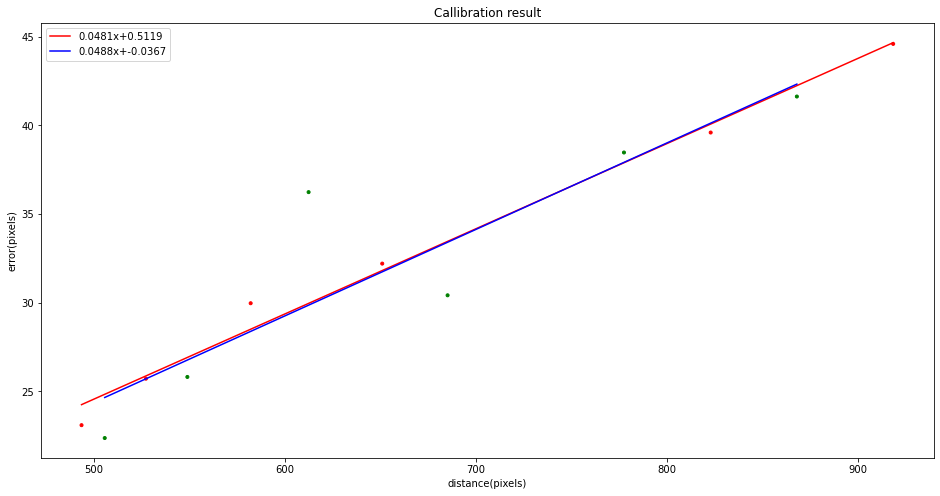

In [28]:
import json
import math
import pandas as pd
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
x = [[],[],[],[]]
y = [[],[],[],[]]
x_all = []
y_all = []
colors = []
for count, i in enumerate(data):
    print(count, i)
    try:
        diff_x = diff_x = i['before'][0][0]-803
        diff_y = i['before'][0][1]-578
        length = math.sqrt(diff_x**2+diff_y**2)
        error = math.sqrt((i['after'][0][0]-803)**2+(i['after'][0][1]-578)**2)
        if length < 50:
            print(length)
        if error < 100:
            if diff_x > 0:
                if diff_y < 0:  # 第一象限
                    colors.append('red')
                    x[0].append(length)
                    y[0].append(error)
                else:  # 第四象限
                    colors.append('blue')
                    x[3].append(length)
                    y[3].append(error)
            else:
                if diff_y > 0:  # 第三象限
                    colors.append('yellow')
                    x[2].append(length)
                    y[2].append(error)
                else:  # 第二象限
                    colors.append('green')
                    x[1].append(length)
                    y[1].append(error)
            x_all.append(length)
            y_all.append(error)
        else:
            print(f"large error: {error}, {i}")
    except:
        print(f"error: {i}")

from scipy import stats
def myfunc(x):
    return slope * x + intercept
list_color = ['red', 'blue', 'yellow', 'green']
for j in range(2):
    print(f"x: {x[j]}, y:{y[j]}")
    slope, intercept, r, p, std_err = stats.linregress(x[j], y[j])
    print(r)
    mymodel = list(map(myfunc, x[j]))
    plt.plot(x[j], mymodel, label=f'{slope:.4f}x+{intercept:.4f}',c=list_color[j])
plt.scatter(x_all, y_all, c=colors, marker='.')
# plt.plot(x, mymodel, c='r')
plt.xlabel('distance(pixels)')
plt.ylabel('error(pixels)')
plt.title('Callibration result')
plt.legend(loc=2)
plt.show()

In [48]:
slope, intercept, r, p, std_err = stats.linregress(x_all, y_all)
new_ratio = 1.773/(1-slope)
new_ratio

1.796590773891608

In [64]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

TypeError: 'list' object is not callable

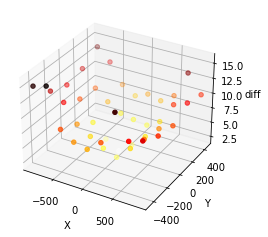

In [43]:
# 3d fig
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import math
  
# Opening JSON file
f = open("../findcenter_callibration.json")
data = json.load(f)
x = []
y = []
diff = []
for i in data:
    diff_x = i['before'][0][0]-960
    diff_y = i['before'][0][1]-540
    diff_after = math.sqrt((i['after'][0][0]-960)**2+(i['after'][0][1]-540)**2)
    x.append(diff_x)
    y.append(diff_y)
    diff.append(diff_after)

ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x, y, diff, c=diff, cmap="hot_r")  # 绘制数据点
# ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
# ax.scatter(x[30:40], y[30:40], z[30:40], c='g')

ax.set_zlabel('diff')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()


In [37]:
len(x)

45